# Linear Regression

In [11]:
%matplotlib inline

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters

learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2)/(2*n_samples))
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050, cost=0.087757759, W=0.307775, b=0.382916


Epoch: 0100, cost=0.086510286, W=0.304314, b=0.407809


Epoch: 0150, cost=0.085407056, W=0.301060, b=0.431222


Epoch: 0200, cost=0.084431380, W=0.297999, b=0.453243


Epoch: 0250, cost=0.083568595, W=0.295120, b=0.473954


Epoch: 0300, cost=0.082805619, W=0.292412, b=0.493432


Epoch: 0350, cost=0.082130969, W=0.289866, b=0.511752


Epoch: 0400, cost=0.081534378, W=0.287471, b=0.528982


Epoch: 0450, cost=0.081006818, W=0.285218, b=0.545189


Epoch: 0500, cost=0.080540314, W=0.283099, b=0.560431


Epoch: 0550, cost=0.080127858, W=0.281106, b=0.574767


Epoch: 0600, cost=0.079763122, W=0.279232, b=0.588251


Epoch: 0650, cost=0.079440646, W=0.277469, b=0.600934


Epoch: 0700, cost=0.079155527, W=0.275811, b=0.612862


Epoch: 0750, cost=0.078903526, W=0.274252, b=0.624078


Epoch: 0800, cost=0.078680739, W=0.272785, b=0.634628


Epoch: 0850, cost=0.078483783, W=0.271406, b=0.644549


Epoch: 0900, cost=0.078309655, W=0.270109, b=0.653881


Epoch: 0950, cost=0.078155749, W=0.268889, b=0.662658


Epoch: 1000, cost=0.078019693, W=0.267741, b=0.670913
Optimization Finished!
Training cost= 0.0780197 W= 0.267741 b= 0.670913


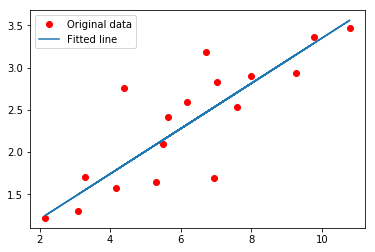

In [12]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print('Epoch: {:04d}, cost={:.9f}, W={:f}, b={:f}'
                  .format(epoch+1, c, sess.run(W), sess.run(b)))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b))
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()